In [18]:
import matplotlib.pyplot as plt
import matplotlib
import math as math
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats

In [19]:
def invFx1(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [20]:
def invFx2(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [21]:
def invFyxx2(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) + 1 - 2 * u
    else:
        b = random * (2 - 2 * u ) -1 + 2* u
    return b

In [22]:
def invFyxx1(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) 
    else:
        b = random * (2 - 2 * u)
    return b

In [23]:
def makePoint(coin, random):
    if coin > 0.5:
        return (tB, '')

In [24]:
def makeSample(c):
    if c > 0.5:
        x = invFx1(np.random.uniform(0,1,1))
        y = invFyxx1(x)
        clas = 0
    else:
        x = invFx2(np.random.uniform(0,1,1))
        y = invFyxx2(x)
        clas = 1
    return (x,y, clas)

In [8]:
#generar puntos de train y test
train_points = map(makeSample, np.random.uniform(0,1,1000))
test_points = map(makeSample, np.random.uniform(0,1,300))

xtr,ytr,ctr = zip(*train_points)
arr = np.array(list(zip(xtr,ytr,ctr)))
train_data = pd.DataFrame(data=arr,columns=['x','y','class'])
xte,yte,cte = zip(*test_points)
arrte = np.array(list(zip(xte,yte,cte)))
test_data = pd.DataFrame(data=arrte,columns=['x','y','class'])

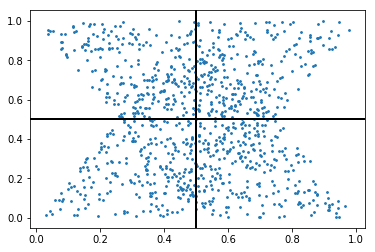

In [35]:
%matplotlib inline
plt.scatter(xtr,ytr,s=3.14)
plt.axhline(0.5, lw=2, color='k', zorder=5)
plt.axvline(0.5, lw=2, color='k', zorder=5)
plt.show()

In [25]:
def getSection_s1(x,y):
    #para esquema 1
    #__________
    #|0        |
    #|_________|
    #|1        |
    #|_________|
    if y > 0.5:
        return 0
    return 1

In [26]:
def getSection_s2(x,y):
    #para esquema 2
    #__________
    #|0   |1   |
    #|    |    |
    #|    |    |
    #|____|____|
    if x > 0.5:
        return 1
    return 0

In [27]:
def getSection_s3(x,y):
    #para esquema 2
    #__________
    #|0   |1   |
    #|____|____|
    #|2   |3   |
    #|____|____|
    if (x < 0.5):
        if (y > 0.5):
            return 0
        else:
            return 2
    else:
        if (y > 0.5):
            return 1
        else:
            return 3

In [28]:
def getSection_s4(x,y):
    #para esquema 4
    #__________
    #|0       /|
    #|      /  |
    #|    /    |
    #|  /    1 |
    #|/________|
    if (y > x):
        return 0
    else:
        return 1

In [29]:
def getSection_s5(x,y):
    #para esquema 5
    #__________
    #|\      0 |
    #|  \      |
    #|    \    |
    #| 1    \  |
    #|________\|
    if (y > (-x+1)):
        return 0
    else:
        return 1

In [30]:
def getSection_s6(x,y):
    #para esquema 6
    #__________
    #|\    0   /|
    #|  \    /  |
    #|1   \/  2 |
    #|    / \   |
    #|  /  3  \ |
    #|/________\|
    
    if (x < 0.5):
        if (y < x):
            return 3
        elif ((y >= x) and (y < (-x+1))):
            return 1
        elif (y >= (-x+1)):
            return 0
    else:
        if (y < (-x+1)):
            return 3
        elif ((y >= (-x+1)) and (y < x)):
            return 2
        elif (y >= x):
            return 0

In [31]:
def getSection(s,x,y):
    if s==1: 
        return getSection_s1(x,y)    
    elif s==2:
        return getSection_s2(x,y)
    elif s==3:
        return getSection_s3(x,y) 
    elif s==4:
        return getSection_s4(x,y) 
    elif s==5:
        return getSection_s5(x,y) 
    elif s==6:
        return getSection_s6(x,y)     

In [32]:
def runClassification(s,train, test):
    train_data_g = train
    train_data_g['section'] = train_data_g.apply(lambda row: getSection(s,row['x'], row['y']), axis=1)
    section_results_g = train_data_g.groupby(['section', 'class']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:3]
    classifier_g = section_results_g.loc[section_results_g.groupby('section')['count'].idxmax()].reset_index().iloc[:,1:4]
    test_data_g = test
    test_data_g['section'] = test_data_g.apply(lambda row: getSection(s,row['x'], row['y']), axis=1)
    test_data_g['classification'] = test_data_g.apply(lambda row, c=classifier_g.transpose(): c.at['class',int(row['section'])], axis=1)
    test_data_g['result'] = test_data_g.apply(lambda row: int(row['class'])==int(row['classification']), axis=1)
    final_result_g = test_data_g.groupby(['result']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:2]
    return final_result_g

In [33]:
cols=['classificator','errors','valid']
lst=[]
for i in range(1, 7):
    classification = runClassification(i,train_data, test_data)
    lst.append([i,classification.at[0,'count'], classification.at[1,'count']])
general_result = pd.DataFrame(lst,columns=cols)
general_result.sort_values(by=['errors'],ascending=1)

,classificator,errors,valid
0,1,89,211
2,3,89,211
5,6,103,197
3,4,104,196
4,5,109,191
1,2,147,153
